## 6.5 Machine Learning - Unsupervised

### This script contains the following:
#### 1. Importing libraries and data and renaming columns
#### 2. Preprocessing Data
#### 3. The elbow technique
#### 4. k-means clustering

### 1. Importing libraries and data and renaming columns

In [66]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np
import pandas as pd
import os

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [67]:
path = '/Users/schitchards/Career Foundry/Achievement 6'

In [68]:
df = pd.read_csv(os.path.join(path,'Data','Prepared Data','df6_2.csv'),index_col=0)

### 2. Preprocessing Data

In [69]:
df.head()

Order Date  Row ID    Order ID       Ship Mode  Customer ID      Segment  \
0    20-1-01     849  2017107503  Standard Class        14725     Consumer   
1    20-1-01    4010  2017144463  Standard Class        20725     Consumer   
2    20-1-01    6683  2017154466     First Class        13390  Home Office   
3    20-1-01    8070  2017151750  Standard Class        15250     Consumer   
4    20-1-01    8071  2017151750  Standard Class        15250     Consumer   

         Country         City       State  Postal Code  ...  \
0  United States       Lorain        Ohio        44052  ...   
1  United States  Los Angeles  California        90036  ...   
2  United States     Franklin   Wisconsin        53132  ...   
3  United States   Huntsville       Texas        77340  ...   
4  United States   Huntsville       Texas        77340  ...   

                                        Product Name  Sales Quantity Discount  \
0                 Linden 10" Round Wall Clock, Black  48.90        4     0.20   
1  Howard Miller 11-1/2" Diameter Brentwood Wall ... 474.43       11     0.00   
2            Wilson Jones Easy Flow II Sheet Lifters   3.60        2     0.00   
3                      SAFCO Boltless Steel Shelving 454.56        5     0.20   
4  Tenex Carpeted, Granite-Look or Clear Contempo... 141.42        5     0.60   

   Profit  Price  Break Even Price  Month  Price category  Profit Category  
0    8.56  14.67             10.08      1       Low price           Profit  
1  199.26  43.13             25.02      1       Low price           Profit  
2    1.73   1.80              0.94      1       Low price           Profit  
3 -107.96 109.09            112.50      1    Middle price             Loss  
4 -187.38  45.25             65.76      1       Low price             Loss  

[5 rows x 24 columns]

In [70]:
df.shape

(3312, 24)

In [71]:
df.describe()

Row ID      Order ID  Customer ID  Postal Code    Sales  Quantity  \
count 3312.00       3312.00      3312.00      3312.00  3312.00   3312.00   
mean  5087.11 2017133983.47     15911.79     56186.52   221.38      3.77   
std   2817.48      20446.02      3428.60     31980.38   585.26      2.22   
min     13.00 2017100013.00     10030.00      1841.00     0.44      1.00   
25%   2655.75 2017117399.25     12940.00     27978.75    17.02      2.00   
50%   5183.50 2017133088.00     15835.00     60472.50    53.81      3.00   
75%   7498.25 2017151750.00     18853.75     90032.00   205.11      5.00   
max   9994.00 2017169999.00     21925.00     99301.00 13999.96     14.00   

       Discount   Profit   Price  Break Even Price   Month  
count   3312.00  3312.00 3312.00           3312.00 3312.00  
mean       0.16    28.21   68.61             52.49    7.73  
std        0.21   241.86  171.13            124.29    3.34  
min        0.00 -3839.99    0.60              0.54    1.00  
25%        0.00     1.76    6.22              3.47    5.00  
50%        0.20     8.30   18.21             12.86    9.00  
75%        0.20    28.32   68.52             53.23   11.00  
max        0.80  6719.98 3499.99           2959.99   12.00

In [72]:
# Remove scientific notation of outputs
pd.options.display.float_format = '{:.2f}'.format

In [73]:
df.describe()

Row ID      Order ID  Customer ID  Postal Code    Sales  Quantity  \
count 3312.00       3312.00      3312.00      3312.00  3312.00   3312.00   
mean  5087.11 2017133983.47     15911.79     56186.52   221.38      3.77   
std   2817.48      20446.02      3428.60     31980.38   585.26      2.22   
min     13.00 2017100013.00     10030.00      1841.00     0.44      1.00   
25%   2655.75 2017117399.25     12940.00     27978.75    17.02      2.00   
50%   5183.50 2017133088.00     15835.00     60472.50    53.81      3.00   
75%   7498.25 2017151750.00     18853.75     90032.00   205.11      5.00   
max   9994.00 2017169999.00     21925.00     99301.00 13999.96     14.00   

       Discount   Profit   Price  Break Even Price   Month  
count   3312.00  3312.00 3312.00           3312.00 3312.00  
mean       0.16    28.21   68.61             52.49    7.73  
std        0.21   241.86  171.13            124.29    3.34  
min        0.00 -3839.99    0.60              0.54    1.00  
25%        0.00     1.76    6.22              3.47    5.00  
50%        0.20     8.30   18.21             12.86    9.00  
75%        0.20    28.32   68.52             53.23   11.00  
max        0.80  6719.98 3499.99           2959.99   12.00

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 3311
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Date        3312 non-null   object 
 1   Row ID            3312 non-null   int64  
 2   Order ID          3312 non-null   int64  
 3   Ship Mode         3312 non-null   object 
 4   Customer ID       3312 non-null   int64  
 5   Segment           3312 non-null   object 
 6   Country           3312 non-null   object 
 7   City              3312 non-null   object 
 8   State             3312 non-null   object 
 9   Postal Code       3312 non-null   int64  
 10  Region            3312 non-null   object 
 11  Product ID        3312 non-null   object 
 12  Category          3312 non-null   object 
 13  Sub-Category      3312 non-null   object 
 14  Product Name      3312 non-null   object 
 15  Sales             3312 non-null   float64
 16  Quantity          3312 non-null   int64  


In [75]:
# parse date
df['Order Date'] = pd.to_datetime(df['Order Date'], format = "%y-%m-%d")
df.head()

Order Date  Row ID    Order ID       Ship Mode  Customer ID      Segment  \
0 2020-01-01     849  2017107503  Standard Class        14725     Consumer   
1 2020-01-01    4010  2017144463  Standard Class        20725     Consumer   
2 2020-01-01    6683  2017154466     First Class        13390  Home Office   
3 2020-01-01    8070  2017151750  Standard Class        15250     Consumer   
4 2020-01-01    8071  2017151750  Standard Class        15250     Consumer   

         Country         City       State  Postal Code  ...  \
0  United States       Lorain        Ohio        44052  ...   
1  United States  Los Angeles  California        90036  ...   
2  United States     Franklin   Wisconsin        53132  ...   
3  United States   Huntsville       Texas        77340  ...   
4  United States   Huntsville       Texas        77340  ...   

                                        Product Name  Sales Quantity Discount  \
0                 Linden 10" Round Wall Clock, Black  48.90        4     0.20   
1  Howard Miller 11-1/2" Diameter Brentwood Wall ... 474.43       11     0.00   
2            Wilson Jones Easy Flow II Sheet Lifters   3.60        2     0.00   
3                      SAFCO Boltless Steel Shelving 454.56        5     0.20   
4  Tenex Carpeted, Granite-Look or Clear Contempo... 141.42        5     0.60   

   Profit  Price  Break Even Price  Month  Price category  Profit Category  
0    8.56  14.67             10.08      1       Low price           Profit  
1  199.26  43.13             25.02      1       Low price           Profit  
2    1.73   1.80              0.94      1       Low price           Profit  
3 -107.96 109.09            112.50      1    Middle price             Loss  
4 -187.38  45.25             65.76      1       Low price             Loss  

[5 rows x 24 columns]

In [76]:
df.isnull().values.any()

False

In [77]:
# Monetary Function

# Finding total amount spent per customer
monetary = df.groupby("Customer ID").Sales.sum()
monetary = monetary.reset_index()
monetary.head()

Customer ID   Sales
0        10030   18.70
1        10045 2475.85
2        10060 2936.26
3        10075 1921.00
4        10090  841.36

In [78]:
#Frequency function

# Getting the count of orders made by each customer based on customer ID.
frequency = df.groupby("Customer ID")['Order ID'].count()
frequency = frequency.reset_index()
frequency.head()

Customer ID  Order ID
0        10030         1
1        10045         7
2        10060         8
3        10075        12
4        10090         8

In [79]:
#creating master dataset
master = monetary.merge(frequency, on = "Customer ID", how = "inner")
master.head()

Customer ID   Sales  Order ID
0        10030   18.70         1
1        10045 2475.85         7
2        10060 2936.26         8
3        10075 1921.00        12
4        10090  841.36         8

In [80]:
# Finding max data
maximum = max(df['Order Date'])

In [81]:
# Adding one more day to the max data, so that the max date will have 1 as the difference and not zero.
maximum = maximum + pd.DateOffset(days = 1)

In [82]:
df['diff'] = maximum - (df['Order Date'])
df.head()

Order Date  Row ID    Order ID       Ship Mode  Customer ID      Segment  \
0 2020-01-01     849  2017107503  Standard Class        14725     Consumer   
1 2020-01-01    4010  2017144463  Standard Class        20725     Consumer   
2 2020-01-01    6683  2017154466     First Class        13390  Home Office   
3 2020-01-01    8070  2017151750  Standard Class        15250     Consumer   
4 2020-01-01    8071  2017151750  Standard Class        15250     Consumer   

         Country         City       State  Postal Code  ...  Sales Quantity  \
0  United States       Lorain        Ohio        44052  ...  48.90        4   
1  United States  Los Angeles  California        90036  ... 474.43       11   
2  United States     Franklin   Wisconsin        53132  ...   3.60        2   
3  United States   Huntsville       Texas        77340  ... 454.56        5   
4  United States   Huntsville       Texas        77340  ... 141.42        5   

  Discount  Profit  Price  Break Even Price  Month  Price category  \
0     0.20    8.56  14.67             10.08      1       Low price   
1     0.00  199.26  43.13             25.02      1       Low price   
2     0.00    1.73   1.80              0.94      1       Low price   
3     0.20 -107.96 109.09            112.50      1    Middle price   
4     0.60 -187.38  45.25             65.76      1       Low price   

   Profit Category     diff  
0           Profit 365 days  
1           Profit 365 days  
2           Profit 365 days  
3             Loss 365 days  
4             Loss 365 days  

[5 rows x 25 columns]

In [83]:
#Dataframe merging by recency
recency = df.groupby('Customer ID')['diff'].min()
recency = recency.reset_index()
recency.head()

Customer ID    diff
0        10030 13 days
1        10045 89 days
2        10060 55 days
3        10075 35 days
4        10090 29 days

In [84]:
#Combining all recency, frequency and monetary parameters
RFM = master.merge(recency, on = "Customer ID")
RFM.columns = ['Customer ID','Sales','Frequency','Recency']
RFM.head()

Customer ID   Sales  Frequency Recency
0        10030   18.70          1 13 days
1        10045 2475.85          7 89 days
2        10060 2936.26          8 55 days
3        10075 1921.00         12 35 days
4        10090  841.36          8 29 days

In [85]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 692
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Customer ID  693 non-null    int64          
 1   Sales        693 non-null    float64        
 2   Frequency    693 non-null    int64          
 3   Recency      693 non-null    timedelta64[ns]
dtypes: float64(1), int64(2), timedelta64[ns](1)
memory usage: 27.1 KB


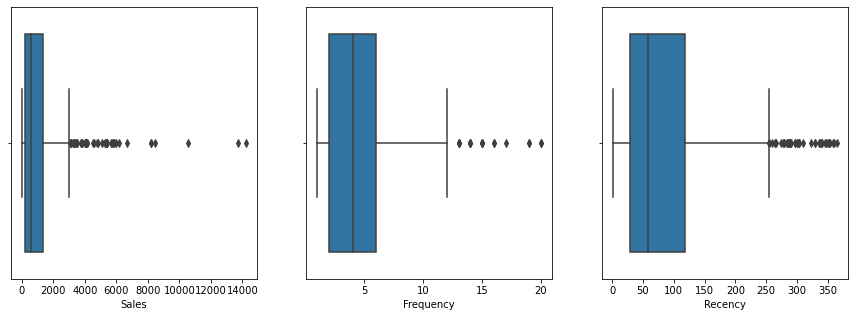

In [86]:
# outlier treatment for Amount
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(RFM.Sales, ax = axs[0])
sns.boxplot(RFM.Frequency, ax = axs[1])
sns.boxplot(RFM.Recency.dt.days, ax = axs[2])

plt.tight_layout
plt.show()

In [87]:
# outlier treatment for Sales
Q1 = RFM.Sales.quantile(0.25)
Q3 = RFM.Sales.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Sales >= Q1 - 1.5*IQR) & (RFM.Sales <= Q3 + 1.5*IQR)]

In [88]:
# outlier treatment for Frequency
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

In [89]:
# outlier treatment for Recency
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

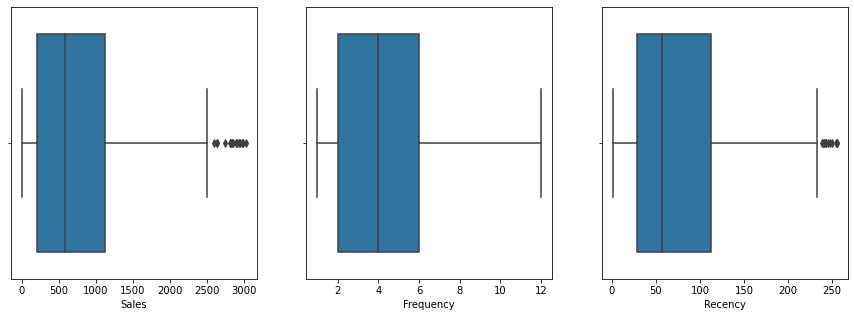

In [90]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(RFM.Sales, ax = axs[0])
sns.boxplot(RFM.Frequency, ax = axs[1])
sns.boxplot(RFM.Recency.dt.days, ax = axs[2])

plt.tight_layout
plt.show()

In [91]:
RFM.head()

Customer ID   Sales  Frequency Recency
0        10030   18.70          1 13 days
1        10045 2475.85          7 89 days
2        10060 2936.26          8 55 days
3        10075 1921.00         12 35 days
4        10090  841.36          8 29 days

In [92]:
# standardise all parameters
RFM_norm1 = RFM.drop("Customer ID", axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [93]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Sales','Recency']
RFM_norm1.head()

Frequency  Sales  Recency
0      -1.07  -1.33    -1.02
1       2.44   0.95     0.21
2       3.10   1.33    -0.34
3       1.65   2.85    -0.66
4       0.11   1.33    -0.76

### 3. The elbow technique

In [94]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [95]:
score = [kmeans[i].fit(RFM_norm1).score(RFM_norm1) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.
score

[-1788.0,
 -1111.1275998332271,
 -805.6780192405172,
 -642.194873648475,
 -550.5186811271598,
 -488.73059883715865,
 -428.31259116914435,
 -383.0636512325036,
 -349.5586676741489]

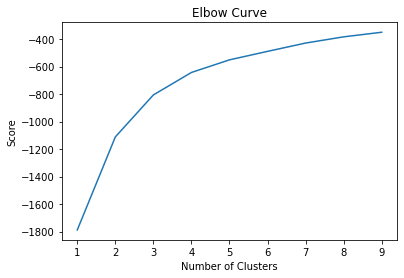

In [96]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a jump from two to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

### 4. k-means clustering

#### Customer Segmentation

In [97]:
# Create the k-means object.
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,n_clusters=4, n_init=10, random_state=None, tol=0.0001, verbose=0)

In [98]:
# Fit the k-means object to the data.
kmeans.fit(RFM_norm1)

KMeans(algorithm='auto', n_clusters=4)

In [99]:
RFM_norm1['clusters'] = kmeans.fit_predict(RFM_norm1)

In [100]:
RFM_norm1['clusters'].value_counts()

3    195
2    183
1    112
0    106
Name: clusters, dtype: int64

In [101]:
# analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(kmeans.labels_)], axis=1)
RFM_km.columns = ['Customer ID', 'Sales', 'Frequency', 'Recency', 'clusters']
RFM_km.head()

Customer ID   Sales  Frequency Recency  clusters
0        10030   18.70          1 13 days         3
1        10045 2475.85          7 89 days         1
2        10060 2936.26          8 55 days         1
3        10075 1921.00         12 35 days         1
4        10090  841.36          8 29 days         2

In [102]:
RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_sales = pd.DataFrame(RFM_km.groupby(['clusters']).Sales.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(['clusters']).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(['clusters']).Recency.mean())

In [103]:
df2 = pd.concat([pd.Series([0,1,2,3]), km_clusters_sales, km_clusters_frequency, km_clusters_recency], axis=1)
df2.columns = ["clusters", "Sales_mean", "Frequency_mean", "Recency_mean"]
df2.head()

clusters  Sales_mean  Frequency_mean  Recency_mean
0         0      562.82            3.33        182.98
1         1     1920.02            7.17         54.76
2         2      718.74            5.95         41.13
3         3      256.79            2.23         63.33

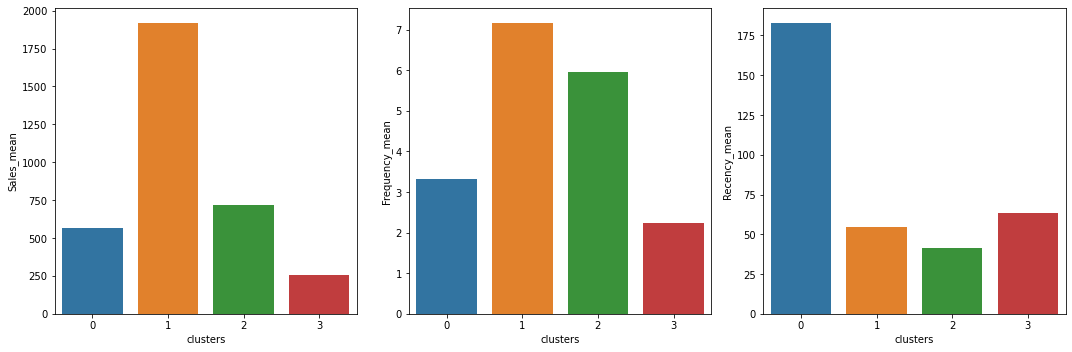

In [105]:
fig, axs = plt.subplots(1,3, figsize = (15,5))
sns.barplot(x=df2.clusters, y=df2.Sales_mean, ax = axs[0])
sns.barplot(x=df2.clusters, y=df2.Frequency_mean, ax = axs[1])
sns.barplot(x=df2.clusters, y=df2.Recency_mean, ax = axs[2])
plt.tight_layout()            
plt.show()

    - During the Recency, Frequency, Monetary (RFM) analysis I found that Customers with cluster ID 1 are the top customers for sales and frequency of purchases but their targeted marketing needs to be increased to improve their recency mean.
    - Customers with cluster ID 0 appear to be a new customer base.
    - Based on results more targeted marketing needs to be done for clusters 1 and 2 to improve their recency.
    -Customer with cluster ID 0 are the least profitable customer group.

In [114]:
#creating master dataset
master2 = RFM_km.merge(df, on = 'Customer ID', how = "inner")
master2.head()

Customer ID  Sales_x  Frequency  Recency  clusters Order Date  Row ID  \
0        10030    18.70          1       13         3 2020-12-18    3200   
1        10045  2475.85          7       89         1 2020-01-02    1341   
2        10045  2475.85          7       89         1 2020-01-02    1342   
3        10045  2475.85          7       89         1 2020-01-02    1343   
4        10045  2475.85          7       89         1 2020-08-01    1834   

     Order ID       Ship Mode    Segment  ... Sales_y Quantity Discount  \
0  2017164000  Standard Class  Corporate  ...   18.70        7     0.20   
1  2017113481     First Class  Corporate  ...  695.70        2     0.50   
2  2017113481     First Class  Corporate  ...   15.66        5     0.70   
3  2017113481     First Class  Corporate  ...   28.85        6     0.70   
4  2017162691  Standard Class  Corporate  ... 1439.98        3     0.40   

   Profit  Price Break Even Price Month Price category Profit Category  \
0    2.34   3.21             2.34    12      Low price          Profit   
1  -27.83 521.78           361.76     1     High price            Loss   
2  -12.53   5.32             5.64     1      Low price            Loss   
3  -21.16   8.18             8.34     1      Low price            Loss   
4 -264.00 671.99           567.99     8     High price            Loss   

      diff  
0  13 days  
1 364 days  
2 364 days  
3 364 days  
4 152 days  

[5 rows x 29 columns]

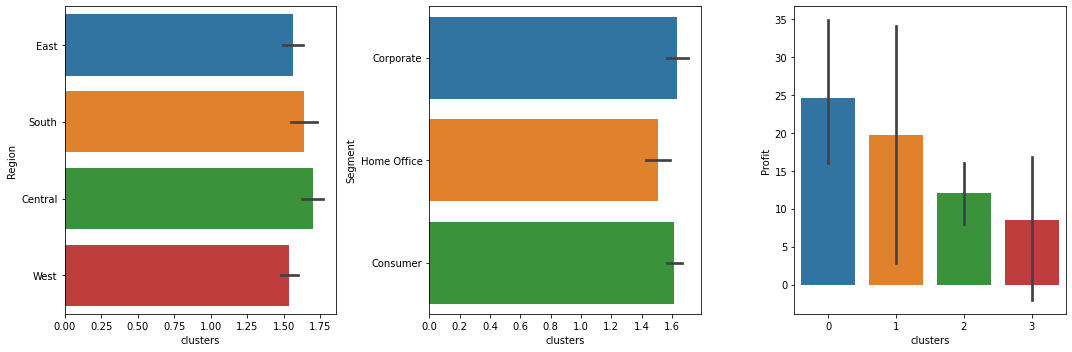

In [116]:
fig, axs = plt.subplots(1,3, figsize = (15,5))
sns.barplot(x=master2.clusters, y=master2.Region, ax = axs[0])
sns.barplot(x=master2.clusters, y=master2.Segment, ax = axs[1])
sns.barplot(x=master2.clusters, y=master2.Profit, ax = axs[2])
plt.tight_layout()            
plt.show()

In [118]:
master2.to_csv(os.path.join(path,'Data','Prepared Data','cluster_df.csv'))